# Splines with threading



In [1]:
import multiprocessing as mp
import threading as th

import numpy as np
import matplotlib.pyplot as plt
import timeit
import time

%matplotlib inline

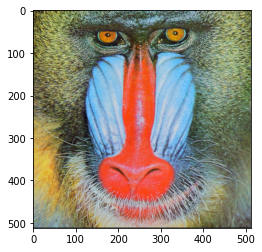

In [8]:
img = plt.imread("mandrill.jpg")
_ = plt.imshow(img)

In [9]:
# Ширина и высота
n = img.shape[0]
m = img.shape[1]

def cut(img):
    img1 = img.copy()
    for i in range(n):
        for j in range(m):
            if (i % 2 == 0) or (j % 2 == 0):
                img1[i][j] = 0
    return img1

In [10]:
def show(new_img, img, name1: str, name2 = 'original image'):
    f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 15))
    ax1.set_title(name1)
    _ = ax1.imshow(new_img)
    ax2.set_title(name2)
    _ = ax2.imshow(img)  

# Квадратичный сплайн + multiprocessing

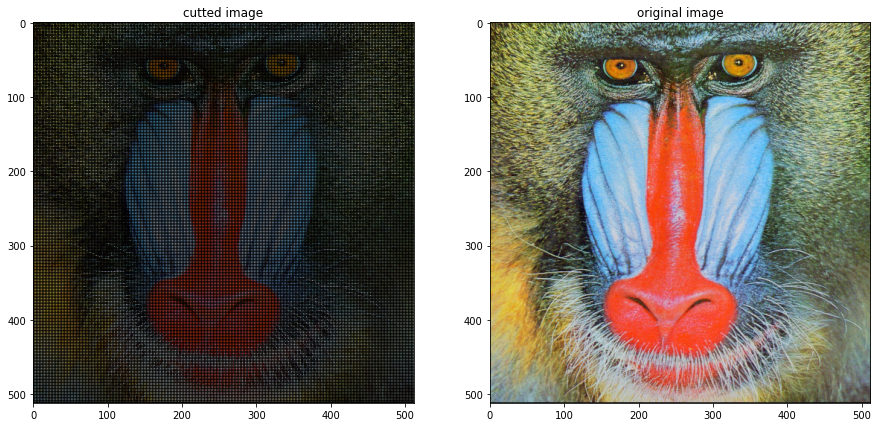

In [11]:
img_cutted = cut(img)
show(img_cutted, img, 'cutted image')

In [13]:
# Функция, с заранее известными коэффициентами 
def u(u_j, u_j1):
    array = np.abs(0.5 * u_j + 0.5 * u_j1)
    return np.where(array > 255, 255, array)

In [14]:
def quadratic_spline_row():
    for i in range(0, n):
        for j in range(1, m - 1, 2):
            img_cutted[i][j] = u(img_cutted[i][j - 1], img_cutted[i][j + 1])


#   восстанавливаем столбцы
def quadratic_spline_column():
    for j in range(0, m):
        for i in range(1, n - 1, 2):
            img_cutted[i][j] = u(img_cutted[i - 1][j], img_cutted[i + 1][j])


In [15]:
def process_quadratic():
    t1 = th.Thread(target=quadratic_spline_row, args=[])
    t2 = th.Thread(target=quadratic_spline_column, args=[])

    t1.start()
    t2.start()

    t1.join()
    t2.join()

    
    

start_time = time.time()

process_quadratic()

print("--- %s seconds ---" % (time.time() - start_time))

--- 5.92839789390564 seconds ---


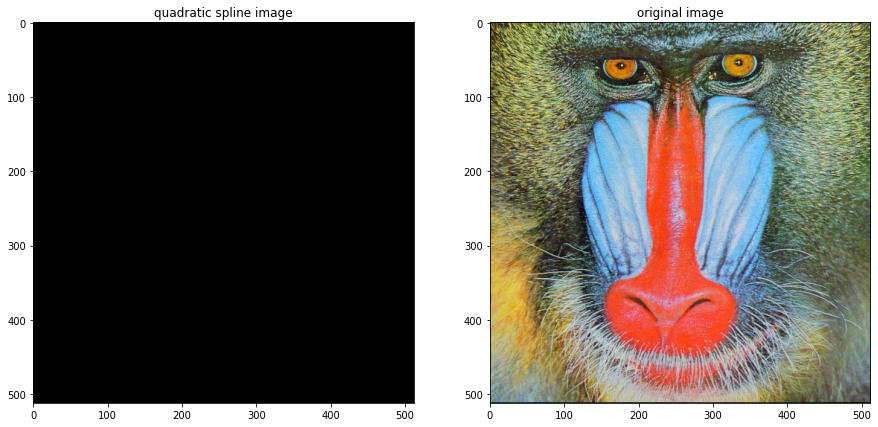

In [16]:
show(img_cutted, img, 'quadratic spline image')

# Кубический сплайн + multiprocessing

In [15]:
img_cutted = cut(img)

In [16]:
def right_u(u_j, u_j1, u_j2):

    array = np.abs(u_j*0.375 + u_j1*0.75  - u_j2*0.125)
    
    return np.where(array > 255, 255, array)

In [17]:
def left_u(u_j, u_j1, u_j_1):

    array = np.abs(u_j*0.375 + u_j1*0.75  - u_j_1*0.125)
    
    return np.where(array > 255, 255, array)

In [24]:
def cubic_spline_row(result, img_cutted):
#   восстанавливаем строки
    for i in range(0, 2*n):
        for j in range(1, 2*m - 1, 2):         
            if j < m:
                result[i][j] = right_u_(img_cutted[i][j-1], img_cutted[i][j+1], img_cutted[i][j+3])
                
            else:
                result[i][j] = left_u(img_cutted[i][j-1], img_cutted[i][j+1], img_cutted[i][j-3])
    
    result = result + img_cutted

#   восстанавливаем столбцы
def cubic_spline_colomn(result, img_cutted):
    for j in range(0, 2*m):
        for i in range(1, 2*n - 1, 2):
            if i < n:
                result[i][j] = right_u(img_cutted[i-1][j], img_cutted[i+1][j], img_cutted[i+3][j])
                              
            else:
                result[i][j] = left_u(img_cutted[i-1][j], img_cutted[i+1][j], img_cutted[i-3][j])
    
    result = result + img_cutted

In [25]:
def process_cubic():
    
    

start_time = time.time()

process_cubic()

print("--- %s seconds ---" % (time.time() - start_time))

IndentationError: expected an indented block (<ipython-input-25-336e30be208b>, line 5)